In [132]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
data = pd.read_csv(r"C:\Users\aloka\Downloads\laptops.csv",encoding='latin-1')

In [134]:
data.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [135]:
data.shape

(1303, 13)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
Unnamed: 0          1303 non-null int64
Company             1303 non-null object
Product             1303 non-null object
TypeName            1303 non-null object
Inches              1303 non-null float64
ScreenResolution    1303 non-null object
Cpu                 1303 non-null object
Ram                 1303 non-null object
Memory              1303 non-null object
Gpu                 1303 non-null object
OpSys               1303 non-null object
Weight              1303 non-null object
Price_euros         1303 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.4+ KB


In [137]:
(data.isnull().sum()/1303)*100 # No null values found

Unnamed: 0          0.0
Company             0.0
Product             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price_euros         0.0
dtype: float64

In [138]:
data.columns

Index(['Unnamed: 0', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [139]:
#drop initial column
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [140]:
cat_col = ['Company', 'Product', 'TypeName','ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight'] # seperate categorial features

for col in cat_col :
    print(col+" -",len(data[col].unique()))
  

Company - 19
Product - 618
TypeName - 6
ScreenResolution - 40
Cpu - 118
Ram - 9
Memory - 39
Gpu - 110
OpSys - 9
Weight - 179


In [141]:
data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [142]:
#convert string dtypes to numerical
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()

for x in cat_col :
    
    data[x]=en.fit_transform(data[x])

<Figure size 576x576 with 0 Axes>

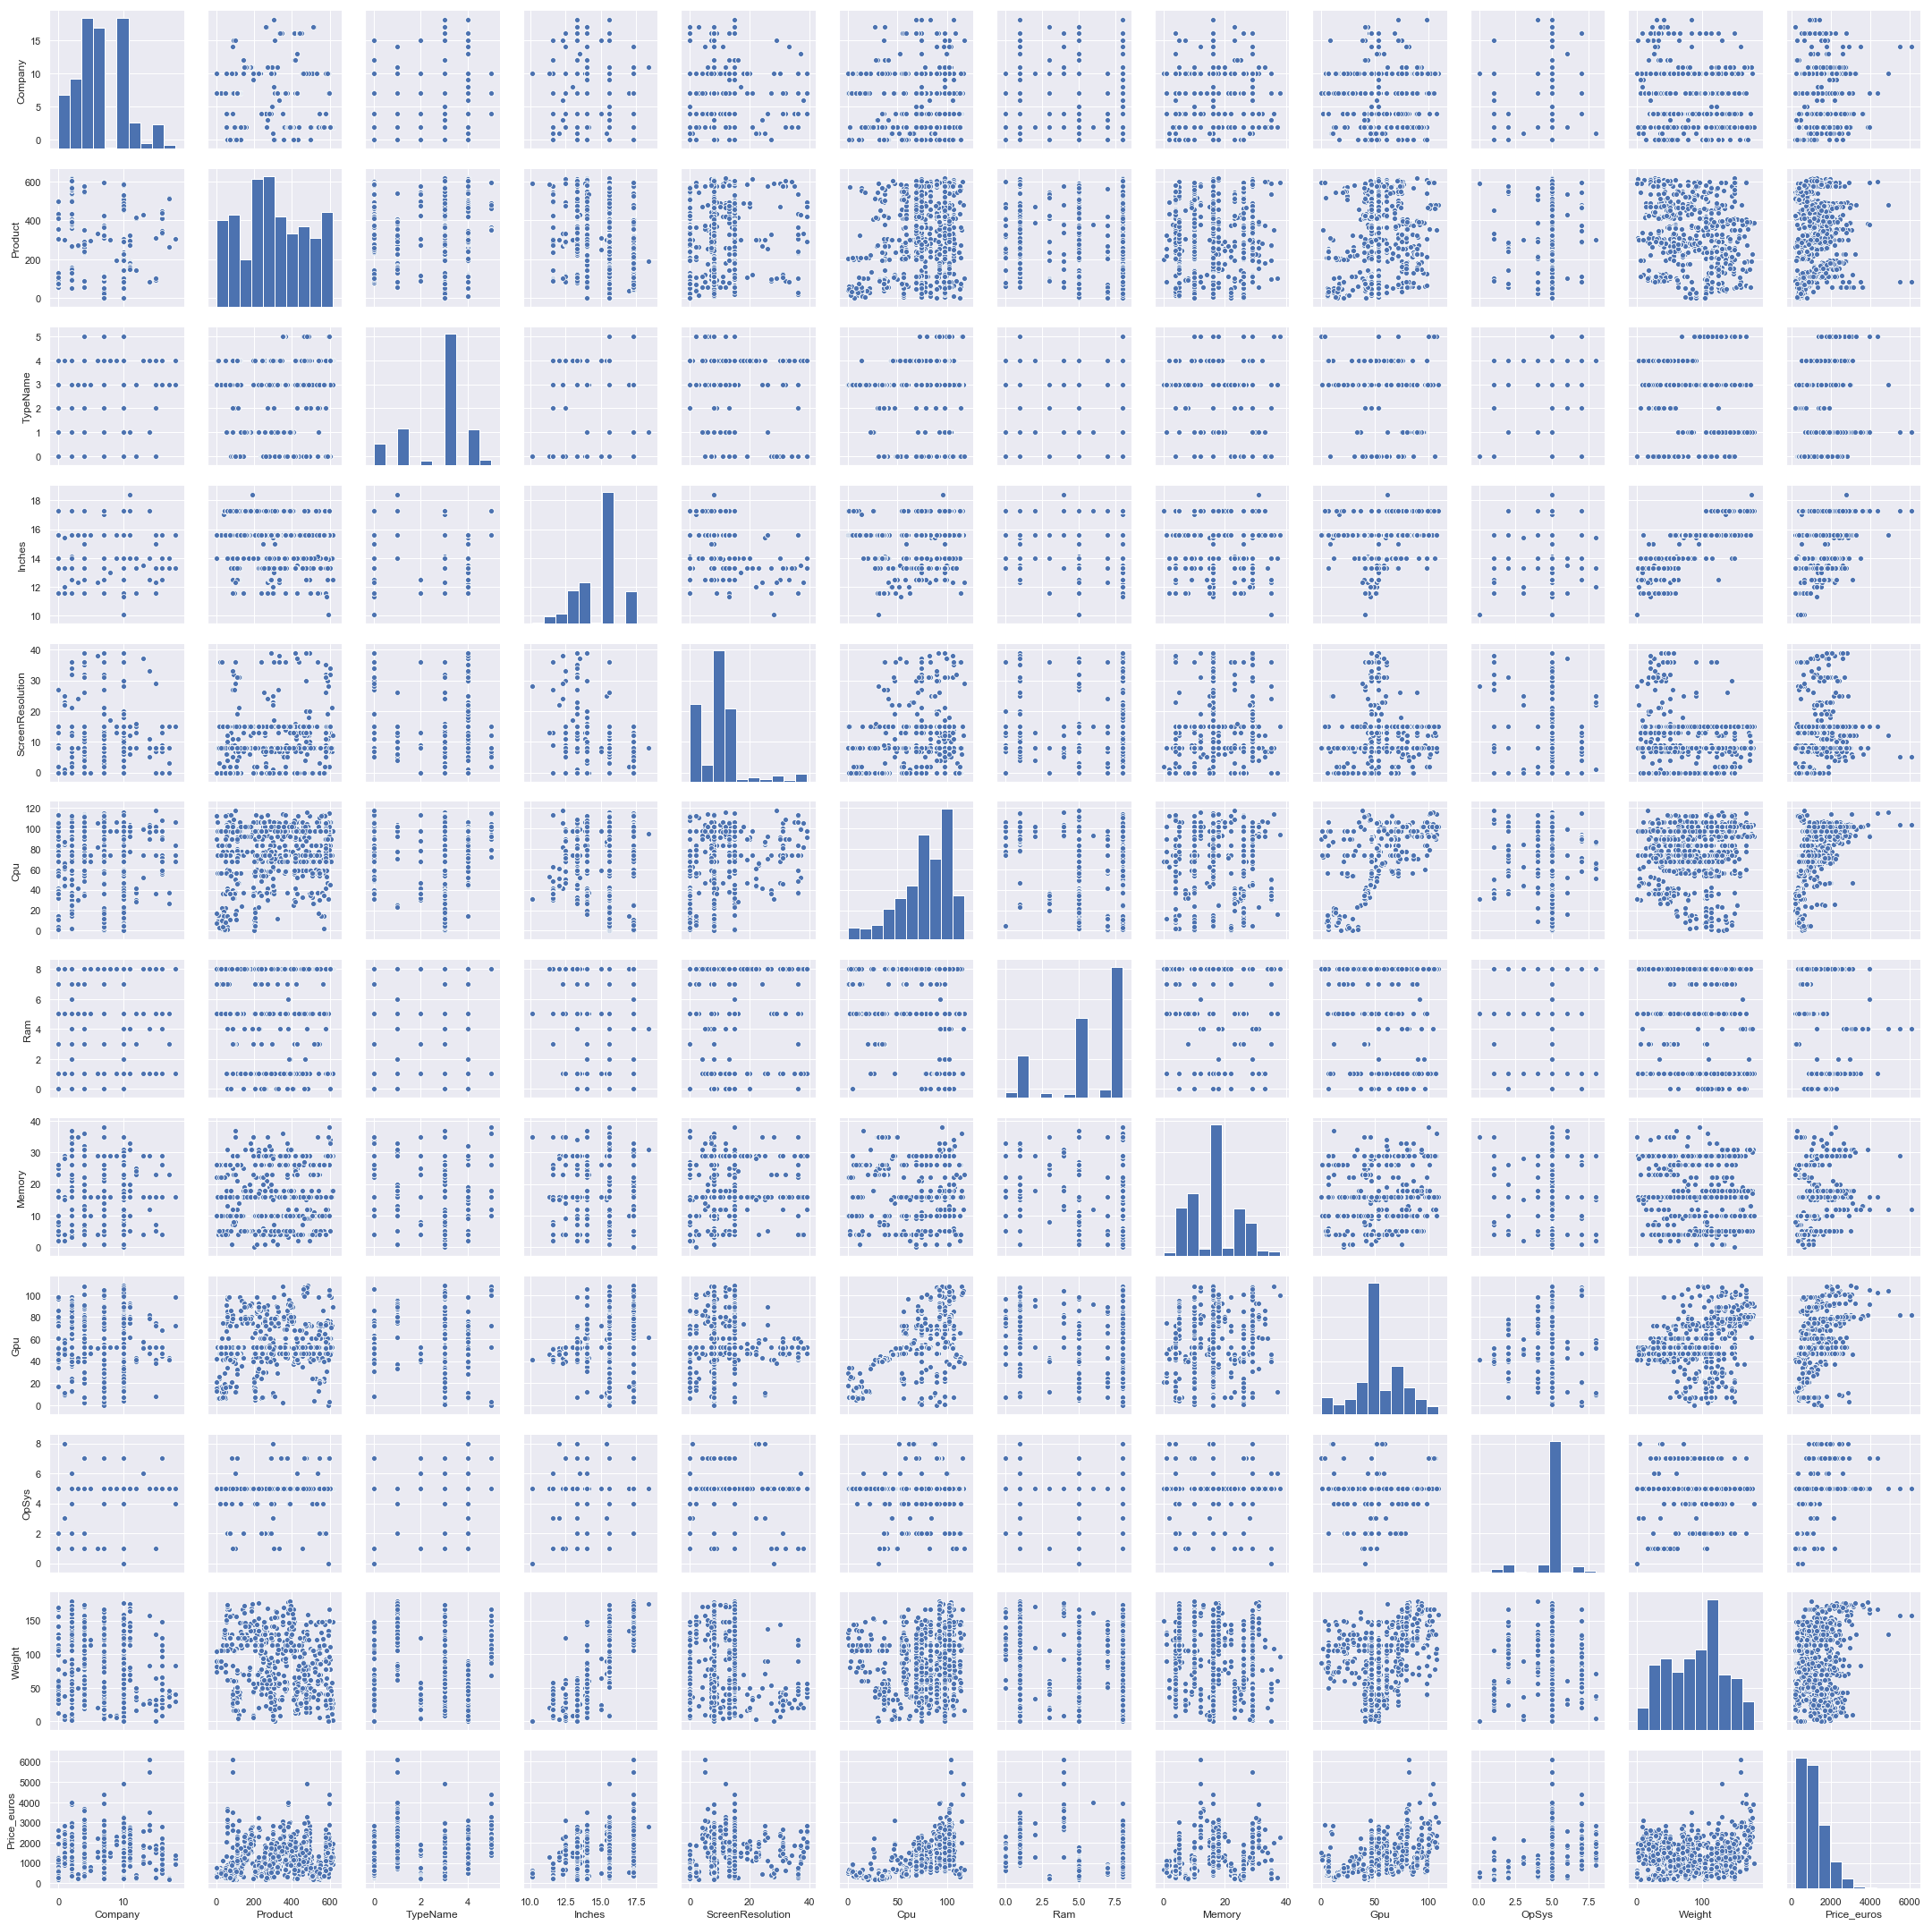

In [143]:
#visualize correlation using pairplot
plt.figure(figsize=(8,8))
sns.pairplot(data)
sns.set()

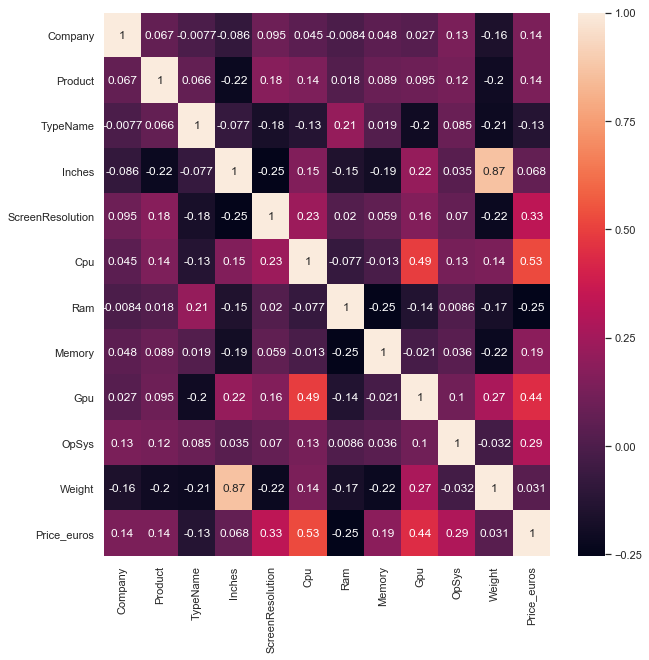

In [144]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
sns.set()

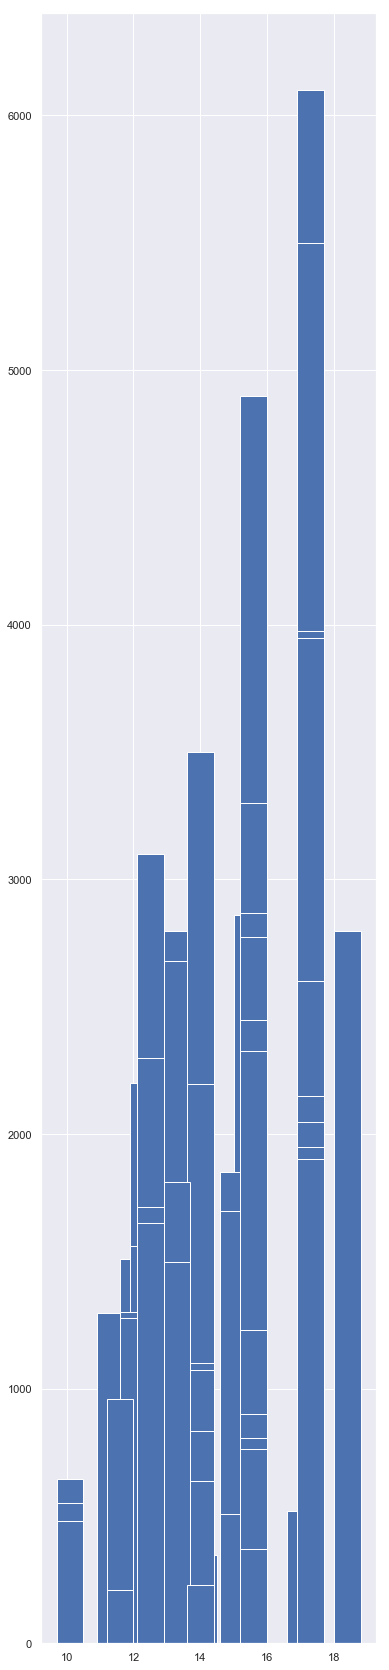

In [145]:
plt.figure(figsize=(6,30))
plt.bar(data["Inches"],data["Price_euros"])
plt.show()



In [119]:
data['Inches']=data['Inches']*data['Weight']

In [146]:
# Scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


In [147]:
scaler = MinMaxScaler()

In [148]:
Y = data['Price_euros']
data.drop(['Price_euros'],axis=1,inplace=True)


X= scaler.fit_transform(data)


C:\Users\aloka\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [149]:
from sklearn.decomposition import PCA
pca = PCA(4)

In [150]:
prc_comp = pca.fit_transform(X)
print(pca.explained_variance_ratio_)


[0.22914727 0.17846737 0.14290453 0.10638537]


In [151]:
df = pd.DataFrame(data = prc_comp, columns = ["component 1", "component 2", "component 3", "component 4"])


In [152]:
from sklearn.model_selection import KFold
kf = KFold(30)

In [154]:
for a,b in kf.split(df):
    X_train, X_test =X[a],X[b]
    y_train, y_test = y[a],y[b]


In [155]:
#import model building libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [156]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()



In [157]:
# fit data in models
model1 = lr.fit(X_train,y_train)
model2 = dtr.fit(X_train,y_train)
model3 = rfr.fit(X_train,y_train)
model4 = gbr.fit(X_train,y_train)

C:\Users\aloka\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [159]:
#check accuracy for each model
print("Accuracy Score of Linear regression on train set",model1.score(X_train,y_train)*100)
print("Accuracy Score of Decision Tree on train set",model2.score(X_train,y_train)*100)# max_accuracy is given by decision tree classifier
print("Accuracy Score of Random Forests on train set",model3.score(X_train,y_train)*100)
print("Accuracy Score of Gradient Boosting on train set",model4.score(X_train,y_train)*100)


Accuracy Score of Linear regression on train set 47.238618905633516
Accuracy Score of Decision Tree on train set 99.95528619351953
Accuracy Score of Random Forests on train set 96.51540981466098
Accuracy Score of Gradient Boosting on train set 92.06756043257677
